# Assignment 4- Notebook- 3.1 Statistics in Python- Scipy lecture Notes- Python Statistics Walkthrough

## Requirements
Install python with the following dependencies with package manager like Anaconda Python or Enthought Canopy. 
- Standard scientific Python environment (numpy, scipy, matplotlib)
- Pandas
- Statsmodels
- Seaborn

*Note*: Python inputs are represented with the sign ">>>" in the Scipy lecture notes.

## 3.1.1. Data Representation and Interaction

### 3.1.1.1. Data as a Table

We consider performing statistical analyses on multiple samples or observations described by a certain attributes, values, or features. These values or samples collectively are data. This data can be organized into a table or matrix with each row providing sample information regarding a cetain attribute.

Figure 1: Screenshot from Scipy lecture notes demonstrates raw data from file **examples/brain_size.csv** (1)

![alt](3_1_1_1_SS.png)

### 3.1.1.2. The Pandas Data-frame

In this notebook we will store and data using a pandas dataframe. A pandas dataframe is equivalent to a spreadsheet table. It has data types arranaged based on columns. 

- Dataframes can be created from CSV (comma separated value) file. Using pandas we can import the data using # pandas.read_csv( ) which will import the file as a dataframe. 

- Below we will read an example data file of observations of brain size, weight, and IQ from Willerman et al., 1991

- The data is a mixture of continuous and categorical data.

Below we will read in the CSV file and examine the data:

In [2]:
import pandas
data=pandas.read_csv('brain_size.csv', sep=';', na_values=".")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


*Note*: For the second individual in this dataframe, the weight was not provided. Because we specified that na_values=".", this relays that if there is an empty field within the data set then this point will be labelled NA= not available. This will allow us to generate a data frame and perform the intended analyses. 

#### Creating from arrays:

A dataframe can seen as arrays or lists (this will be a 1D representation of the data) 

Below we will use ***numpy*** to generate three arrays.

Numpy is a python library used for generation of multi-dimentional arrays, matracies and can perform high level mathematical computations. 

In [3]:
import numpy as np
t=np.linspace(-6,6,20)
sin_t=np.sin(t)
cos_t=np.cos(t)

We can then display the calculated values in a new dataframe. Below we will generate a dataframe with the new arrays. The function reminds me of the print function used in Assignment 3. 

In [4]:
pandas.DataFrame({'t':t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


Above is the sin and cos of t within the data.

#### Manipulating data

There are multiple ways to evaluate and interact with data within a pandas dataframe. We are able to evaluate:

- The data frame shape (number of rows and columns)= data.shape

- The data frame column labels= data.columns

- Provide the values of a specific column= print(data['column label']) 

- Specific summary calculations for specific columns= data[data['column'] == 'female']['VIQ']. mean()

These codes will be executed below:

In [5]:
data.shape

(40, 8)

In [6]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [7]:
print (data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [8]:
data[data['Gender']=='Female']['VIQ'].mean()

np.float64(109.45)

**Note** use 'pandas.DataFrame.describe()' to visualize in a large dataframe

Additionally, we can organize the data by grouping data in the dataframe based on categorical variables
    
- You can group by a variable and obtain summary values for each category-- like mean, median, mode etc. 

- To do this you should use the **groupby_'variable'** function, as demonstrated below:

In [9]:
groupby_gender= data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


In this example, we find the mean of VIQ for each gender. 

While above is used to find the specific mean of a specific column of data. But, you can also find the mean (or any other summary statistic) for various columns.

In [10]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


- If you begin to type groupby_gender.. and then hit tab to finish the typing you can trial various summary statistics.

- You can also perform summary statistics using boxplots.

Below is the generation of summary boxplots for different columns.

Female         Axes(0.1,0.15;0.363636x0.75)
Male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

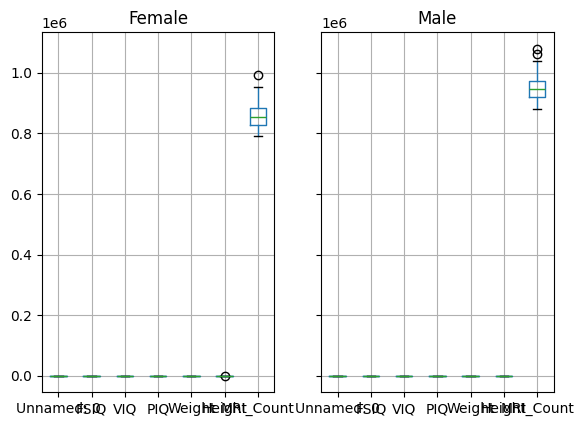

In [11]:
groupby_gender.boxplot()

*Note*: I dont know how to fix the scaling- will plan to talk with Dr. Frietas about this issue. 

#### Plotting Data

Data can be plotted using pandas, with matplotlib working with the system.

First we will generate scatter matricies. Please see the code and output below:

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

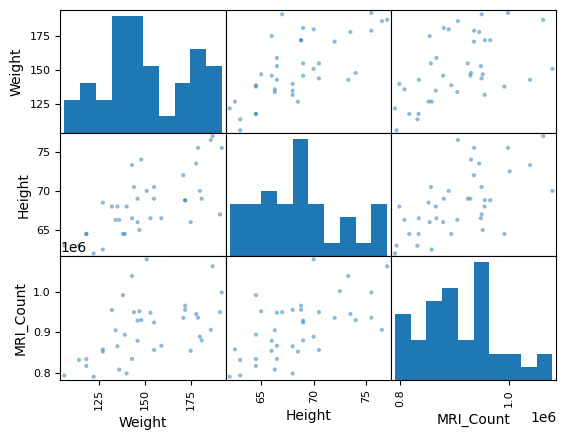

In [12]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

Below we will peform scater matrix evaluating different IQ scores:

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

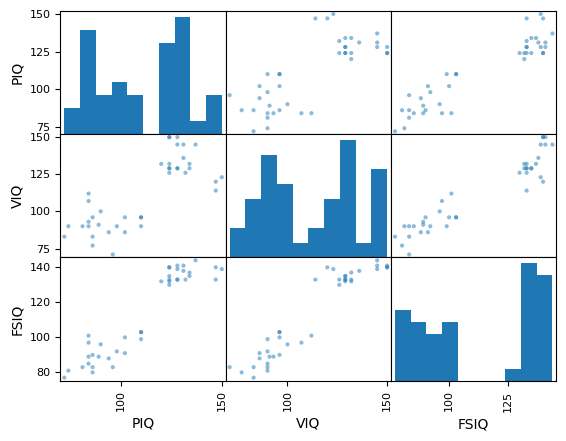

In [13]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

### 3.1.2. Hypothesis Testing: Comparing Two Groups

Below we will demonstrate how python can use scipy.stats to perform statistical tests.

To use this library of functions we need to initially import stats functions of scipy, see the command line below:

In [14]:
from scipy import stats

#### 3.1.2.1. Student's t-test: the simplest statistical test

**1-sample t-test: testing the value of a population mean**

- This statistical test is useful to test if the population mean of data is equal to a given value.
- When performing this test we will use "scipy.stats.ttest_1samp()" in which we will specify the data of interest and give the value to compare the mean.
- Below is an example comparing the mean of VIQ to a value of 0. This will provide a T statistic and a p-value.

-Unless specified p-values of <0.05 are considered significant. 

In [15]:
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

This p-value is <0.05 as it is 1.32x10^-28 therefore the mean VIQ is significantly different from 0. 

**2-Sample T-test: Testing for Difference Across Populations**

- This statsitical test is useful to test if a population or subset of the population is significantly different from another population or subset of the population.
- p-values <0.05 are considered significantly different.
- Below we will compare mean VIQ between male and female populations.


In [16]:
female_viq = data[data['Gender']=='Female']['VIQ']
male_viq = data[data['Gender']=='Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

The p-value is >0.05 and therefore there is not a significant difference between the groups. 

#### 3.1.2.2. Paired Tests: Repeated Measurements on the Same Individuals

- In this section we will examine statistical tests to compare multiple measurements performed on the same subject.
- In this specific example we will first look at the three forms of IQ meausrements PIQ, VIQ, and FSIQ.
    - We will start by evaluaing, using a 2 sample t-test, if there is a significant difference between FSIQ and PIQ.

See the example command line for the 2 sample T-test below:

In [17]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

As you can see above the P-value for this 2 sample T-test is >0.05 so there is not a significant difference between the data

But what is not demonstrated with the two sample T-test is that these measurements are repated over time and can also be compared within the same subject over multiple sampling points. This will remove inter-subject variability.

For a paired t-test observe the sample command line below evaluating FSIQ compared to PIQ as a paired comparison

In [18]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

*Note*: this is equivalent to a one sample test of the difference between the two types of data. 

See the command line below to demonstrate the shared p-value:

In [19]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

#### Non-Gaussian Distribution Data

For data that does not follow a normal gaussian distribution we can perform a Wilcoxon signed-rank test for paired data and a Mann-Whitney U test for non-paired data. 

For mann-whitney u test- scipy.stats.mannwhitneyu()

For Willcoxon signed-rank test follow the example command line below:

In [20]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

## 3.1.3. Linear Models, Multiple Factors, and Analysis of Variance

### 3.1.3.1. "Formulas" to Specify Statsitical Models in Python 

#### A Simple Linear Regression

In this portion of the tutorial we discuss how to evaluate a scatter plot data, and how to generate a linear regression model of best fit for the data using python.

In this we will generate a linear function which uses the following formula:

**y=x * coef+ intercept + e**

for this line y and x coordinates are specified by the linear regression and e represents the observation noise. 

To generate a line we will use statsmodels module

 - We will fit a lineear model using ordinary least squares (OLS)
 - We will test that the coef is non-zero

First we will generate an example new set of data, see command line inputs below:

In [21]:
import numpy as np
x = np.linspace(-5,5,20)
np.random.seed(1)
# normal distributed noise incorporated into the generated data below
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Creating a data frame containing all of the relevant variables below, note we will now be using a different 'data'
data = pandas.DataFrame({'x': x, 'y': y})

Once we have generated the example dataframe, which is now our new 'data', we can then specify an OLS model and create a line of fit. 

See command line below on how to execute this:


In [22]:
from statsmodels.formula.api import ols
model = ols("y ~ x",data).fit()

We can then inspect the statistics born from the linear regression we generated, see the following command line:

In [23]:
print(model.summary())
#this command will provide a summary of the regression results

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           8.56e-08
Time:                        11:41:33   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

R squared values is 0.804 and intercept is -5.5335

*Note*: Regarding the terminology used for linear regression, y represents the value you are trying to predict (endogenous) and x represents the value used to make the prediction (exogenous).

# MAJOR NOTE- Following this code we will transition back to our brain size data!

## Categorical Variables: Comparing Groups or Multiple Categories

Now we will transition back to brain size and IQ data. As we demonstrated at the beginning of this notebook we will read in the brain size CSV and label it 'data'.


In [24]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

Now that we are back to the brain size data we can generate a comparison between IQ of males compared to females.

Specifically looking at VIQ and Gender

In [25]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 17 Jul 2025   Prob (F-statistic):              0.445
Time:                        11:41:33   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

R squared value is 0.015 and intercept is 109.45

*Note*: Helpful tips
Forcing categorical: If you would like to force an interger column to be sorted as a categorical variable you can use "c(...)" 

Example: model=ols('VIQ~C(...), data).fit()

Intercept: You can remove intercept using '-1' in the formula or can force the command to use an intercept using '+1'


#### Link to t-tests between different FSIQ and PIQ
Here we will compare different types of IQ using linear regression and we will then link a 2 sample t-test to compare the two.

First to generate the linear regression we will create long-form tables of the IQ data. 

To create the long form tables, generate the OLS and compare the two variables with a 2 sample t-test see the command line input below:

In [26]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [27]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 17 Jul 2025   Prob (F-statistic):              0.643
Time:                        11:41:33   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

R squared value is 0.003 and intercept is 113.45 and p-value is 0.643

We will now perform a t-test to compare and we will obtain the same test statistic and p-value

Command line for 2-sample t-test below

In [28]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

### 3.1.3.2. Multiple Regression data: including multiple factors

In this section we will examine data in which we also evaluate the z-plane (in addtion to x and y plane). 

**z=xc(1) + yc(2) + i + e**

This will therefore generate 3D data compared to the 2D data described previously.

In this portion we will demonstrate these functions using "the iris data" using **examples/iris.csv** This looks at the septal size and how it relates to petal size and can relate it to species. 

Below we will read in the data---> therefore 'data' from this point will represent the iris data.

Below we will demonstrate the command lines for evaluating this data:

In [29]:
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           1.58e-20
Time:                        11:41:33   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

R squared value 0.478 and intercept is 2.9813

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

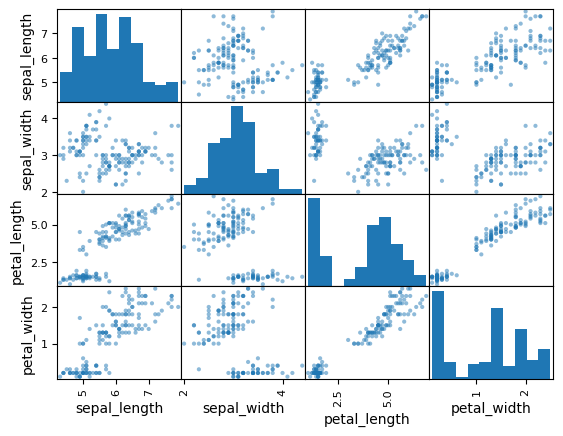

In [30]:
from pandas import plotting
plotting.scatter_matrix(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]) 

*Redemonstrated how to create plots as performed earlier in the notes.*

### 3.1.3.3. Post-Hoc Hypothesis Testing: Analysis of Variance 

In the iris example above we want to now test if petal length is different between versicolor and virginica after removing the effect of septal width. 

This can be done by testing the difference between the coefficient associated to versicolor and virginica in the linear model above. 

We want to test with a vector of 'contrast' 

"name[T.versicolor] - name[T.virginica]" with an F test

See command line below for F-test

In [31]:
print(model.f_test([0,1,-1,0]))

<F test: F=3.245335346574177, p=0.0736905878170114, df_denom=146, df_num=1>


The difference betwen the two is not significant as it is >0.05

## 3.1.4. More Visualization: seaborn for Statistical Exploration

In this section we will explore using Seaborn- this library of functions combines simple statistical fits with plotting on pandas dataframes. 

In this portion we are evaluating data on wages and a collection of personal information of 500 individuals. 
    Citation for data "Berndt, ER. The Practice of Econometrics. 1991. NY: Addison-Wesley"

Below we will undergo the standard library imports for the seaborn library:

In [32]:
# Standard library imports
import urllib
import os

import matplotlib.pyplot as plt

Next is the method for loading the data from the website link and then formatting the data from the webpage:


In [33]:
import pandas

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

/tmp/slurmtmp.1695051/ipykernel_907353/1791500727.py:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,


Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

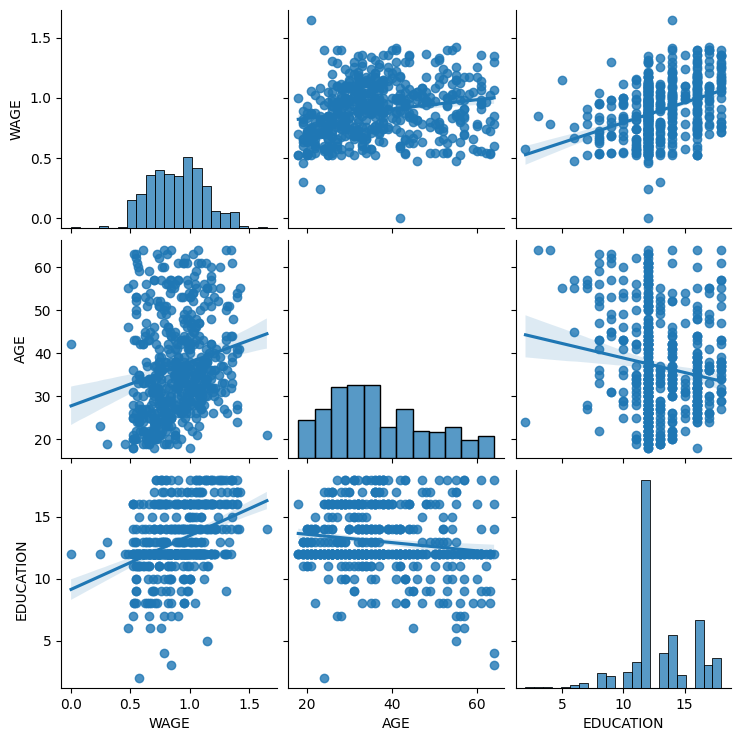

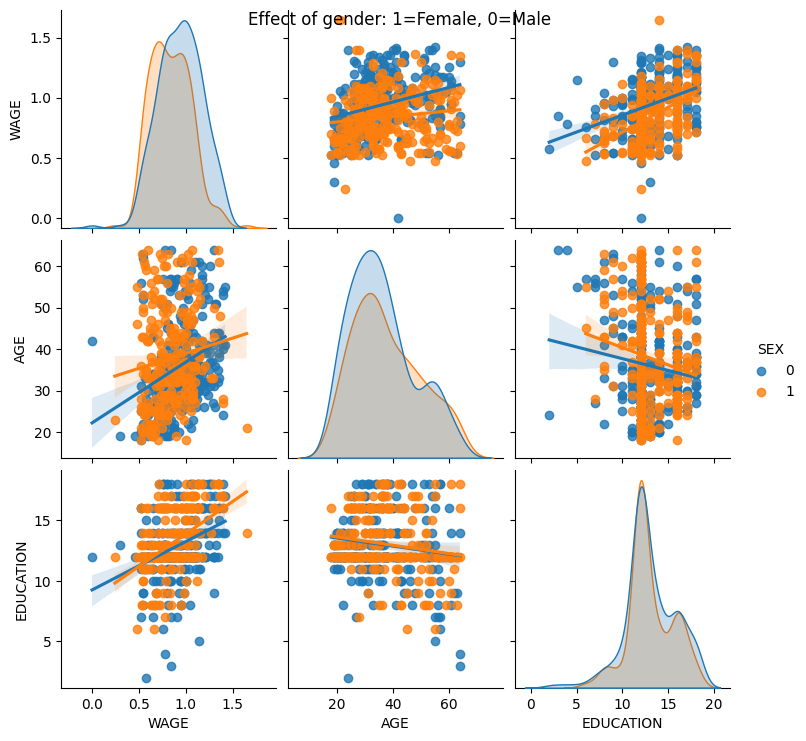

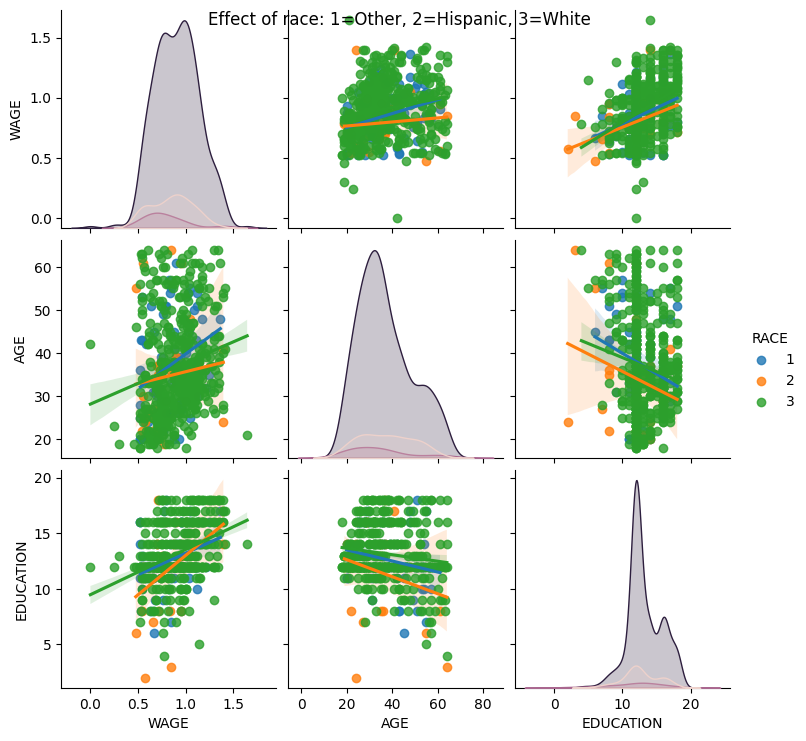

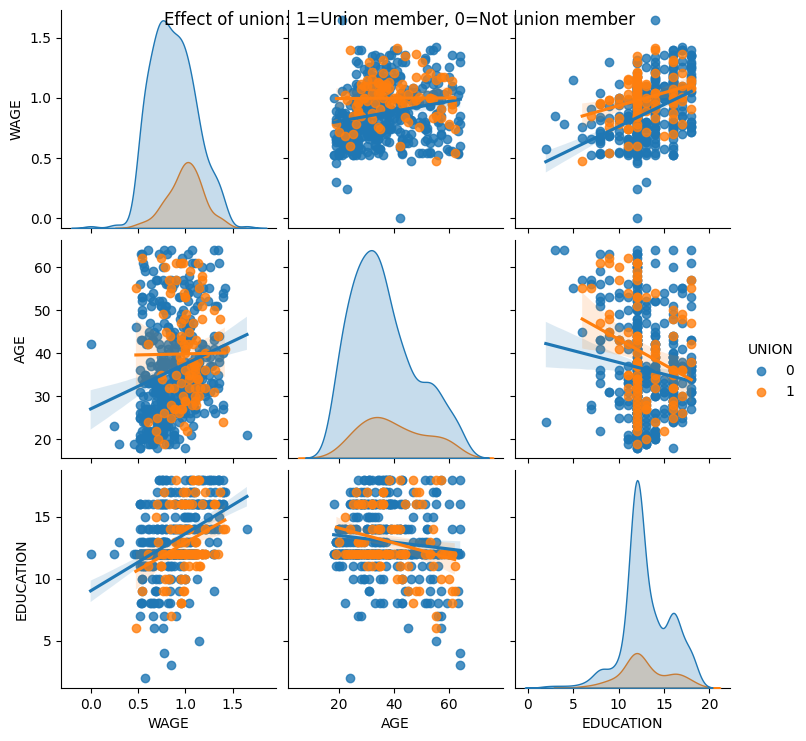

In [34]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

This represents scatter matrices highlighting different aspects of the data. Comparing multiple continuous variables. And differnt categories can be differentiated by modifying the hue.

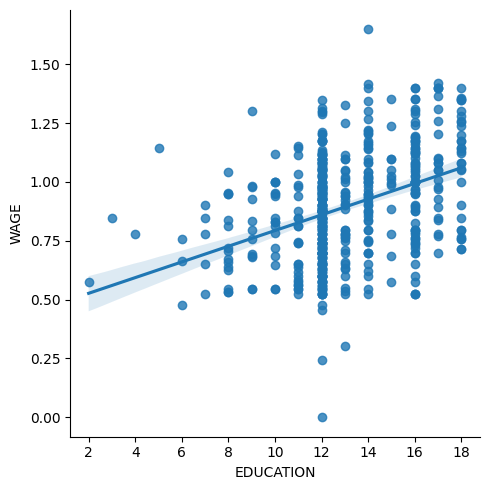

In [35]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

plt.show()

This demonstrates a simple linear regression of the data. 

## 3.1.5. Testing for Interactions

In this section we are evaluating the data based on two different categorical variables. 

This allows the user to delineate what portion of the data represents one variable and can create a unique linear regression line. 

Command line demonstration to evaluate wage and education relationship with separation by gender. 



In [36]:
data

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,0,5,0,1.055378,29,3,5,0,0
530,12,0,1,33,0,0.785330,51,1,5,0,1
531,17,0,1,25,1,1.366423,48,1,5,0,1
532,12,1,0,13,1,1.298416,31,3,5,0,1


In [39]:
from statsmodels.formula.api import ols
result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',

                data=data).fit() 

In [40]:
result

In [41]:
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           2.94e-25
Time:                        11:47:52   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861

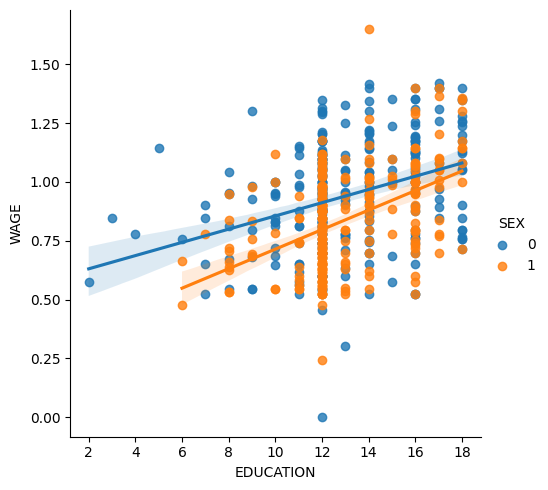

In [42]:
seaborn.lmplot(y='WAGE', x='EDUCATION', hue='SEX', data=data)